In [7]:
from bs4 import BeautifulSoup
import requests
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import folium

In [8]:
df = pd.read_csv('Vizag_Pincodes.csv')
df

,Location,Pincode,City,State
0,A Kothapalle,531022,Visakhapatnam,Andhra Pradesh
1,A U engg college,530003,Visakhapatnam,Andhra Pradesh
2,A Veeranarayanam,531027,Visakhapatnam,Andhra Pradesh
3,Adakula,531115,Visakhapatnam,Andhra Pradesh
4,Addumanda,531077,Visakhapatnam,Andhra Pradesh
5,Adduru,531035,Visakhapatnam,Andhra Pradesh
6,Aduguluputtu,531040,Visakhapatnam,Andhra Pradesh
7,Aerodrome,530009,Visakhapatnam,Andhra Pradesh
8,Aganampudi,530046,Visakhapatnam,Andhra Pradesh
9,Airport,530009,Visakhapatnam,Andhra Pradesh


In [9]:
geolocator = Nominatim(timeout=10, user_agent = "Explore_Vizag")
location = geolocator.geocode('Visakhapatnam,Andhra Pradesh')
location


Location(Visakhapatnam, Andhra Pradesh, 530001, India, (17.7231276, 83.3012842, 0.0))

In [10]:
mapa = folium.Map(location=(17.781783, 83.370876), zoom_start=9)
display(mapa)

In [11]:
df_ = pd.read_csv('Vizag_Longlat.csv')
df_

,Latitude,Longitude,Neighborhood
0,18.211466,82.535531,"Adduru, Visakhapatnam, Andhra Pradesh, India"
1,17.686012,83.135476,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530..."
2,17.721842,83.235434,"Visakhapatnam International Airport, NH16, Kak..."
3,17.727487,83.299088,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva..."
4,17.931495,83.003157,"Alamanda, Visakhapatnam, Andhra Pradesh, India"
5,17.585323,82.590878,"Amalapuram, Visakhapatnam, Andhra Pradesh, India"
6,17.759608,83.071767,"Ammulapalem, Visakhapatnam, Andhra Pradesh, India"
7,17.688970,83.003476,"Anakapalle, Visakhapatnam, Andhra Pradesh, 531..."
8,17.686163,83.002393,"Anakapalle, Anakapalle - Pudimadaka Road, Anak..."
9,17.642570,82.829113,"Anandapuram, Visakhapatnam, Andhra Pradesh, India"


In [13]:
# create map of New York using latitude and longitude values
latitude = 17.7231276 
longitude = 83.3012842
map_Vizag = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_['Latitude'], df_['Longitude'], df_['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_Vizag)  
    
map_Vizag.save('Vizag_Map.html')


In [16]:
CLIENT_ID = 'RNSVXDE5FXAPD3PHINMXOERS4Y4NZYBWZQHON001PULMWAHD' # your Foursquare ID
CLIENT_SECRET = 'G2FI1LJNV0HJTBCYDW1TIILFBWOVIUYXORPLIH04B3MHNZBX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RNSVXDE5FXAPD3PHINMXOERS4Y4NZYBWZQHON001PULMWAHD
CLIENT_SECRET:G2FI1LJNV0HJTBCYDW1TIILFBWOVIUYXORPLIH04B3MHNZBX


In [17]:
df_.loc[10,'Neighborhood']

'Andhra University, Sivajipalem Road, Sector 4, Pedda Waltair, Visakhapatnam, Andhra Pradesh, 530001, India'

In [18]:
neighborhood_latitude = df_.loc[10,'Latitude']
neighborhood_longitude = df_.loc[10,'Longitude']
neighborhood_name = df_.loc[10,'Neighborhood']

print('Longitude and Latitude  values of {} are {},{}.'.format(neighborhood_name,neighborhood_latitude,neighborhood_longitude))

Longitude and Latitude  values of Andhra University, Sivajipalem Road, Sector 4, Pedda Waltair, Visakhapatnam, Andhra Pradesh, 530001, India are 17.7376312,83.3300513027767.


In [19]:
# type your answer here
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)

In [20]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ccb2863dd5797242d20e0b0'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Vizag',
  'headerFullLocation': 'Vizag',
  'headerLocationGranularity': 'city',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 17.742131204500005,
    'lng': 83.3347670860921},
   'sw': {'lat': 17.733131195499993, 'lng': 83.32533551946129}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '514c807ee4b00b0ee5686d8d',
       'name': 'my restaurant',
       'location': {'address': 'Iskathota',
        'lat': 17.739535630924795,
        'lng': 83.32688247020218,
        'labeledLatLngs': [{'label': 'display',
          'lat': 17.73

In [21]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,my restaurant,Indian Restaurant,17.739536,83.326882
1,Fring,Indian Restaurant,17.741645,83.331995


In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

2 venues were returned by Foursquare.


In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
Vizag_venues = getNearbyVenues(names=df_['Neighborhood'],
                                   latitudes=df_['Latitude'],
                                   longitudes=df_['Longitude']
                                  )

Adduru, Visakhapatnam, Andhra Pradesh, India
Aganampudi, Visakhapatnam, Andhra Pradesh, 530027, India
Visakhapatnam International Airport, NH16, Kakani Nagar, Jaggayyapalem, Visakhapatnam, Andhra Pradesh, 530001, India
Akkayyapalem Main Road, Lalitha Nagar, Srinivasa Nagar, Visakhapatnam, Andhra Pradesh, 530001, India
Alamanda, Visakhapatnam, Andhra Pradesh, India
Amalapuram, Visakhapatnam, Andhra Pradesh, India
Ammulapalem, Visakhapatnam, Andhra Pradesh, India
Anakapalle, Visakhapatnam, Andhra Pradesh, 531001, India
Anakapalle, Anakapalle - Pudimadaka Road, Anakapalle, Visakhapatnam, Andhra Pradesh, 531001, India
Anandapuram, Visakhapatnam, Andhra Pradesh, India
Andhra University, Sivajipalem Road, Sector 4, Pedda Waltair, Visakhapatnam, Andhra Pradesh, 530001, India
Annavaram, Visakhapatnam, Andhra Pradesh, India
Aradakota, Visakhapatnam, Andhra Pradesh, India
Araku, Visakhapatnam, Andhra Pradesh, India
Arilova, Visakhapatnam, Andhra Pradesh, 530001, India
Aripaka, Visakhapatnam, And

In [26]:
print(Vizag_venues.shape)
Vizag_venues.head()

(80, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",17.686012,83.135476,aganampudi panchayat office,17.689123,83.135063,Warehouse Store
1,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",17.686012,83.135476,Apollo Pharmacy,17.688081,83.131680,Pharmacy
2,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",17.727487,83.299088,Sai Ram Parlour,17.726339,83.303465,Indian Restaurant
3,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",17.727487,83.299088,Sangam Sarat Theatre,17.725508,83.302463,Indie Movie Theater
4,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",17.727487,83.299088,Tandoori Inn Restaurent,17.727051,83.302709,Indian Restaurant


In [27]:
Vizag_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Aganampudi, Visakhapatnam, Andhra Pradesh, 530027, India",2,2,2,2,2,2
"Akkayyapalem Main Road, Lalitha Nagar, Srinivasa Nagar, Visakhapatnam, Andhra Pradesh, 530001, India",5,5,5,5,5,5
"Anakapalle, Anakapalle - Pudimadaka Road, Anakapalle, Visakhapatnam, Andhra Pradesh, 531001, India",3,3,3,3,3,3
"Anakapalle, Visakhapatnam, Andhra Pradesh, 531001, India",4,4,4,4,4,4
"Andhra University, Sivajipalem Road, Sector 4, Pedda Waltair, Visakhapatnam, Andhra Pradesh, 530001, India",2,2,2,2,2,2
"Arilova, Visakhapatnam, Andhra Pradesh, 530001, India",2,2,2,2,2,2
"Bheemunipatnam, Visakhapatnam, Andhra Pradesh, 531163, India",3,3,3,3,3,3
"Chengala Rao Peta, MTC Palem, Visakhapatnam, Andhra Pradesh, 530001, India",3,3,3,3,3,3
"Chittivalasa, Visakhapatnam, Andhra Pradesh, 531162, India",2,2,2,2,2,2


In [28]:
print('There are {} unique categories of venues in Vizag'.format(len(Vizag_venues['Venue Category'].unique())))

There are 39 unique categories of venues in Vizag


In [29]:
# one hot encoding
Vizag_onehot = pd.get_dummies(Vizag_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Vizag_onehot['Neighborhood'] = Vizag_venues['Neighborhood'] 


# move neighborhood column to the first column

def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]

Vizag_onehot = change_column_order(Vizag_onehot,'Neighborhood',0)

Vizag_onehot.head()


,Neighborhood,ATM,Asian Restaurant,Athletics & Sports,Bakery,Bar,Basketball Stadium,Beach,Boat or Ferry,Bookstore,...,Pet Service,Pharmacy,Platform,Resort,Restaurant,Shopping Mall,Smoke Shop,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store
0,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
Vizag_grouped = Vizag_onehot.groupby('Neighborhood').mean().reset_index()
Vizag_grouped

,Neighborhood,ATM,Asian Restaurant,Athletics & Sports,Bakery,Bar,Basketball Stadium,Beach,Boat or Ferry,Bookstore,...,Pet Service,Pharmacy,Platform,Resort,Restaurant,Shopping Mall,Smoke Shop,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store
0,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,...,0.0,0.500000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.5
1,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.2,0.0
2,"Anakapalle, Anakapalle - Pudimadaka Road, Anak...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,...,0.0,0.666667,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0
3,"Anakapalle, Visakhapatnam, Andhra Pradesh, 531...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,...,0.0,0.750000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0
4,"Andhra University, Sivajipalem Road, Sector 4,...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0
5,"Arilova, Visakhapatnam, Andhra Pradesh, 530001...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,...,0.5,0.500000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0
6,"Bheemunipatnam, Visakhapatnam, Andhra Pradesh,...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.333333,0.000000,0.000,...,0.0,0.000000,0.000000,0.333333,0.00,0.000000,0.000000,0.0,0.0,0.0
7,"Chengala Rao Peta, MTC Palem, Visakhapatnam, A...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.333333,0.000,...,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0
8,"Chittivalasa, Visakhapatnam, Andhra Pradesh, 5...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,...,0.0,0.500000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0
9,"Chodavaram, Visakhapatnam, Andhra Pradesh, 531...",0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,...,0.0,1.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0


In [31]:
Vizag_grouped.shape

(31, 40)

In [32]:
num_top_venues = 5

for hood in Vizag_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Vizag_grouped[Vizag_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aganampudi, Visakhapatnam, Andhra Pradesh, 530027, India----
                           venue  freq
0                Warehouse Store   0.5
1                       Pharmacy   0.5
2  Vegetarian / Vegan Restaurant   0.0
3                           Park   0.0
4            Indie Movie Theater   0.0


----Akkayyapalem Main Road, Lalitha Nagar, Srinivasa Nagar, Visakhapatnam, Andhra Pradesh, 530001, India----
                           venue  freq
0              Indian Restaurant   0.4
1  Vegetarian / Vegan Restaurant   0.2
2            Indie Movie Theater   0.2
3                           Park   0.2
4                    Pet Service   0.0


----Anakapalle, Anakapalle - Pudimadaka Road, Anakapalle, Visakhapatnam, Andhra Pradesh, 531001, India----
                 venue  freq
0             Pharmacy  0.67
1  Indie Movie Theater  0.33
2          Pet Service  0.00
3  Japanese Restaurant  0.00
4    Mobile Phone Shop  0.00


----Anakapalle, Visakhapatnam, Andhra Pradesh, 531001, India----
      

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Vizag_grouped['Neighborhood']

for ind in np.arange(Vizag_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Vizag_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",Warehouse Store,Pharmacy,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
1,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",Indian Restaurant,Park,Vegetarian / Vegan Restaurant,Indie Movie Theater,Breakfast Spot,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
2,"Anakapalle, Anakapalle - Pudimadaka Road, Anak...",Pharmacy,Indie Movie Theater,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
3,"Anakapalle, Visakhapatnam, Andhra Pradesh, 531...",Pharmacy,Indie Movie Theater,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
4,"Andhra University, Sivajipalem Road, Sector 4,...",Indian Restaurant,Warehouse Store,Harbor / Marina,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store


In [35]:
Vizag_grouped_clustering = Vizag_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Vizag_grouped_clustering )
    Sum_of_squared_distances.append(km.inertia_)

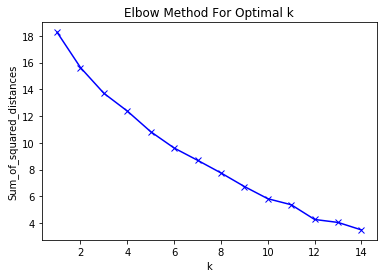

In [36]:
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

In [37]:
# set number of clusters
kclusters = 4

Vizag_grouped_clustering = Vizag_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Vizag_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 3, 1, 1, 1, 1, 1,
       3, 2, 1, 1, 0, 1, 1, 2])

In [38]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted['Cluster Labels'] = pd.to_numeric(neighborhoods_venues_sorted['Cluster Labels'])
Vizag_merged = df_.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Vizag_merged = Vizag_merged.dropna()
Vizag_merged = Vizag_merged.reset_index(drop=True)
cols = ['Neighborhood','Latitude', 'Longitude', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue']
Vizag_merged = Vizag_merged[cols]
Vizag_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",17.686012,83.135476,0.0,Warehouse Store,Pharmacy,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
1,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",17.727487,83.299088,1.0,Indian Restaurant,Park,Vegetarian / Vegan Restaurant,Indie Movie Theater,Breakfast Spot,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
2,"Anakapalle, Visakhapatnam, Andhra Pradesh, 531...",17.688970,83.003476,0.0,Pharmacy,Indie Movie Theater,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
3,"Anakapalle, Anakapalle - Pudimadaka Road, Anak...",17.686163,83.002393,0.0,Pharmacy,Indie Movie Theater,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
4,"Andhra University, Sivajipalem Road, Sector 4,...",17.737631,83.330051,1.0,Indian Restaurant,Warehouse Store,Harbor / Marina,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
5,"Arilova, Visakhapatnam, Andhra Pradesh, 530001...",17.767525,83.313898,0.0,Pharmacy,Pet Service,Warehouse Store,Bookstore,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
6,"Bheemunipatnam, Visakhapatnam, Andhra Pradesh,...",17.891381,83.451218,1.0,Japanese Restaurant,Resort,Beach,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant
7,"Chittivalasa, Visakhapatnam, Andhra Pradesh, 5...",17.933279,83.427611,0.0,Multiplex,Pharmacy,Warehouse Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store,Breakfast Spot
8,"Chodavaram, Visakhapatnam, Andhra Pradesh, 531...",17.829679,82.934484,0.0,Pharmacy,Warehouse Store,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
9,"Dayalnagar Study Centre, Dayalbagh Educational...",17.754359,83.346887,1.0,Asian Restaurant,Grocery Store,Restaurant,Dessert Shop,Warehouse Store,Breakfast Spot,Fish Market,Diner,Cricket Ground,Comfort Food Restaurant


In [39]:
Vizag_merged['Cluster Labels'] = Vizag_merged['Cluster Labels'].apply(np.int32)
Vizag_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",17.686012,83.135476,0,Warehouse Store,Pharmacy,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
1,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",17.727487,83.299088,1,Indian Restaurant,Park,Vegetarian / Vegan Restaurant,Indie Movie Theater,Breakfast Spot,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
2,"Anakapalle, Visakhapatnam, Andhra Pradesh, 531...",17.688970,83.003476,0,Pharmacy,Indie Movie Theater,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
3,"Anakapalle, Anakapalle - Pudimadaka Road, Anak...",17.686163,83.002393,0,Pharmacy,Indie Movie Theater,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
4,"Andhra University, Sivajipalem Road, Sector 4,...",17.737631,83.330051,1,Indian Restaurant,Warehouse Store,Harbor / Marina,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
5,"Arilova, Visakhapatnam, Andhra Pradesh, 530001...",17.767525,83.313898,0,Pharmacy,Pet Service,Warehouse Store,Bookstore,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
6,"Bheemunipatnam, Visakhapatnam, Andhra Pradesh,...",17.891381,83.451218,1,Japanese Restaurant,Resort,Beach,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant
7,"Chittivalasa, Visakhapatnam, Andhra Pradesh, 5...",17.933279,83.427611,0,Multiplex,Pharmacy,Warehouse Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store,Breakfast Spot
8,"Chodavaram, Visakhapatnam, Andhra Pradesh, 531...",17.829679,82.934484,0,Pharmacy,Warehouse Store,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
9,"Dayalnagar Study Centre, Dayalbagh Educational...",17.754359,83.346887,1,Asian Restaurant,Grocery Store,Restaurant,Dessert Shop,Warehouse Store,Breakfast Spot,Fish Market,Diner,Cricket Ground,Comfort Food Restaurant


In [58]:
new_table = pd.DataFrame()
new_table['Cluster Labels'] = Vizag_merged['Cluster Labels']
new_table['10th Most Common Venue'] = Vizag_merged['10th Most Common Venue']
new_table

,Cluster Labels,10th Most Common Venue
0,0,Clothing Store
1,1,Clothing Store
2,0,Clothing Store
3,0,Clothing Store
4,1,Clothing Store
5,0,Clothing Store
6,1,Comfort Food Restaurant
7,0,Breakfast Spot
8,0,Clothing Store
9,1,Comfort Food Restaurant


In [60]:
table = pd.pivot_table(new_table,index='Cluster Labels',columns=['10th Most Common Venue'],aggfunc={'10th Most Common Venue':'count'},fill_value=0)
table.columns

MultiIndex(levels=[['10th Most Common Venue'], ['Bookstore', 'Breakfast Spot', 'Clothing Store', 'Comfort Food Restaurant', 'Cricket Ground']],
           labels=[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4]],
           names=[None, '10th Most Common Venue'])

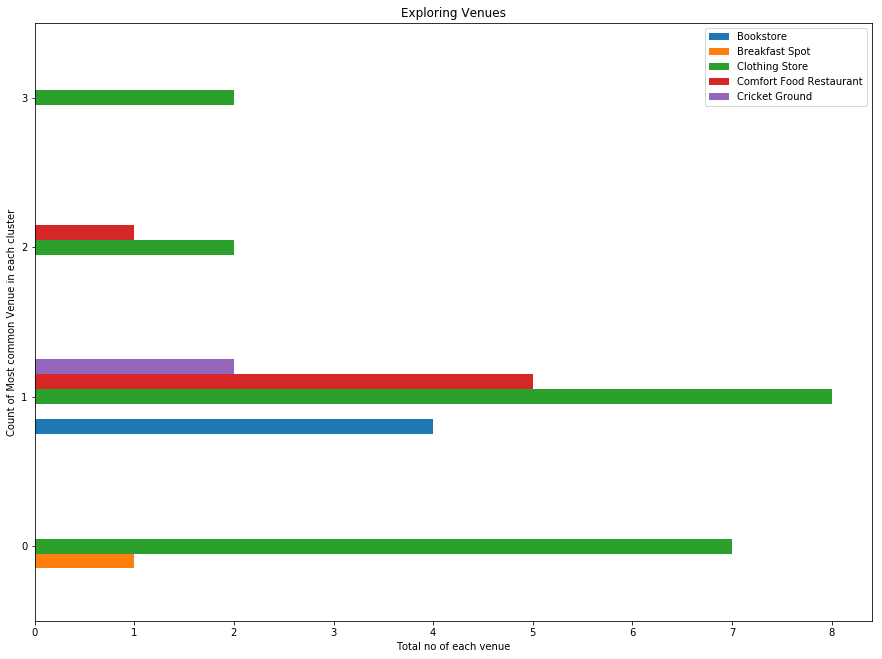

In [61]:
table.plot(kind='barh',figsize=(15,11),align='center')
plt.ylabel('Count of Most common Venue in each cluster')
plt.xlabel('Total no of each venue')
plt.title('Exploring Venues')
plt.gca().legend(('Bookstore', 'Breakfast Spot', 'Clothing Store', 'Comfort Food Restaurant', 'Cricket Ground'))
plt.show() 

In [65]:
table1 = Vizag_merged.groupby(['Cluster Labels','10th Most Common Venue']).agg({'10th Most Common Venue':'count'})
table1

10th Most Common Venue
Cluster Labels 10th Most Common Venue                         
0              Breakfast Spot                                1
               Clothing Store                                7
1              Bookstore                                     4
               Clothing Store                                8
               Comfort Food Restaurant                       5
               Cricket Ground                                2
2              Clothing Store                                2
               Comfort Food Restaurant                       1
3              Clothing Store                                2

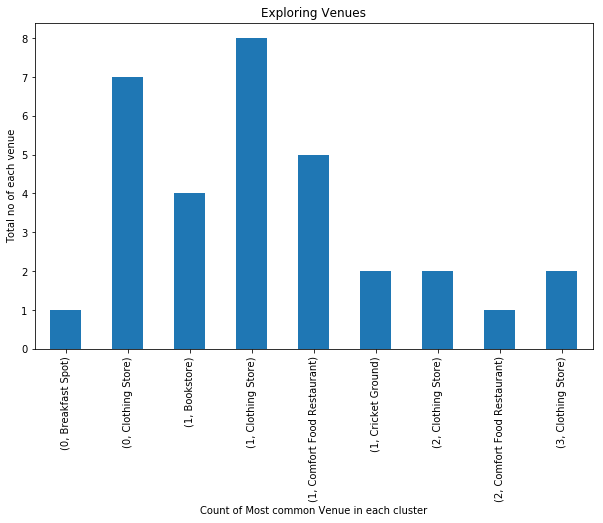

In [66]:
table1.plot(kind='bar',figsize=(10,6),legend=None)
plt.xlabel('Count of Most common Venue in each cluster')
plt.ylabel('Total no of each venue')
plt.title('Exploring Venues')
plt.show()

In [63]:
latitude = 17.6868
longitude = 83.2185
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Vizag_merged['Latitude'], Vizag_merged['Longitude'], Vizag_merged['Neighborhood'], Vizag_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save('map_clusters3.html')

In [43]:
Vizag_merged.loc[Vizag_merged['Cluster Labels'] == 0, Vizag_merged.columns[[0]+[3]+[4] + list(range(5, Vizag_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Aganampudi, Visakhapatnam, Andhra Pradesh, 530...",0,Warehouse Store,Pharmacy,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
2,"Anakapalle, Visakhapatnam, Andhra Pradesh, 531...",0,Pharmacy,Indie Movie Theater,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
3,"Anakapalle, Anakapalle - Pudimadaka Road, Anak...",0,Pharmacy,Indie Movie Theater,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
5,"Arilova, Visakhapatnam, Andhra Pradesh, 530001...",0,Pharmacy,Pet Service,Warehouse Store,Bookstore,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
7,"Chittivalasa, Visakhapatnam, Andhra Pradesh, 5...",0,Multiplex,Pharmacy,Warehouse Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store,Breakfast Spot
8,"Chodavaram, Visakhapatnam, Andhra Pradesh, 531...",0,Pharmacy,Warehouse Store,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
14,"Jaggayyapalem, Sathyavanipalem, Visakhapatnam,...",0,Shopping Mall,Pharmacy,Warehouse Store,Bookstore,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
25,"Vepagunta, Visakhapatnam, Andhra Pradesh, 5300...",0,ATM,Pharmacy,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store


In [44]:
Vizag_merged.loc[Vizag_merged['Cluster Labels'] == 1, Vizag_merged.columns[[0]+[3]+[4] + list(range(5, Vizag_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Akkayyapalem Main Road, Lalitha Nagar, Sriniva...",1,Indian Restaurant,Park,Vegetarian / Vegan Restaurant,Indie Movie Theater,Breakfast Spot,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
4,"Andhra University, Sivajipalem Road, Sector 4,...",1,Indian Restaurant,Warehouse Store,Harbor / Marina,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
6,"Bheemunipatnam, Visakhapatnam, Andhra Pradesh,...",1,Japanese Restaurant,Resort,Beach,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant
9,"Dayalnagar Study Centre, Dayalbagh Educational...",1,Asian Restaurant,Grocery Store,Restaurant,Dessert Shop,Warehouse Store,Breakfast Spot,Fish Market,Diner,Cricket Ground,Comfort Food Restaurant
10,"Duvvada, Kurmannapalem Road, Visweswara Nagar,...",1,Train Station,Warehouse Store,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
11,"RRV Puram, Jaggayyapalem, Prahaladapuram, Visa...",1,Smoke Shop,Shopping Mall,Bakery,Warehouse Store,Breakfast Spot,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant
12,"Gajuwaka, Visakhapatnam, Andhra Pradesh, 53000...",1,Gym,Boat or Ferry,Clothing Store,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant
15,"Kasimkota, Visakhapatnam, Andhra Pradesh, 5310...",1,ATM,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store,Bookstore
16,"Lankelapalem, Visakhapatnam, Andhra Pradesh, 5...",1,Basketball Stadium,Platform,Comfort Food Restaurant,Warehouse Store,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground
18,"Payakaraopeta, Visakhapatnam, Andhra Pradesh, ...",1,Motorcycle Shop,Warehouse Store,Harbor / Marina,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store


In [45]:
Vizag_merged.loc[Vizag_merged['Cluster Labels'] == 2, Vizag_merged.columns[[0]+[3]+[4] + list(range(5, Vizag_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,"Industrial Estate, Srinivasa Nagar, Visakhapat...",2,Bar,Warehouse Store,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
23,"Timmapuram, Visakhapatnam, Andhra Pradesh, 530...",2,Indian Restaurant,Bar,Warehouse Store,Clothing Store,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant
31,"Yendada Road / Gitam back gate Road, Rushikond...",2,Bar,Comfort Food Restaurant,Warehouse Store,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Clothing Store


In [46]:
Vizag_merged.loc[Vizag_merged['Cluster Labels'] == 3, Vizag_merged.columns[[0]+[3]+[4] + list(range(5, Vizag_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,"Nadupuru road, Chaitanya Nagar, Gonthina Vani ...",3,Athletics & Sports,Warehouse Store,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
22,"Thummapala, Visakhapatnam, Andhra Pradesh, 531...",3,Athletics & Sports,Warehouse Store,Breakfast Spot,Grocery Store,Fish Market,Diner,Dessert Shop,Cricket Ground,Comfort Food Restaurant,Clothing Store
